# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [ ]:
# Import the required packages
import os
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [ ]:
#Train
Train='https://drive.google.com/file/d/1xOXquYjDA3nKN685ufUXiWBPfhdt1SL_/view?usp=sharing'
#Test
Test='https://drive.google.com/file/d/1ANXpYaw35RiRj_P28IKbB0fknWMKeCKw/view?usp=sharing'

In [ ]:
###### PARA CARGAR DESDE DRIVE ####
path = 'https://drive.google.com/uc?export=download&id='+Train.split('/')[-2]
#print(path)
train_df=pd.read_csv(path,sep=',', parse_dates=True,header=0)
 
path = 'https://drive.google.com/uc?export=download&id='+Test.split('/')[-2]
#print(path)
test_df=pd.read_csv(path,sep=',', parse_dates=True,header=0)
test_df.head(3)

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes


In [ ]:
#train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
#test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [ ]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [ ]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [ ]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


Observacion de un scatter plot para entender un poco más la base de datos

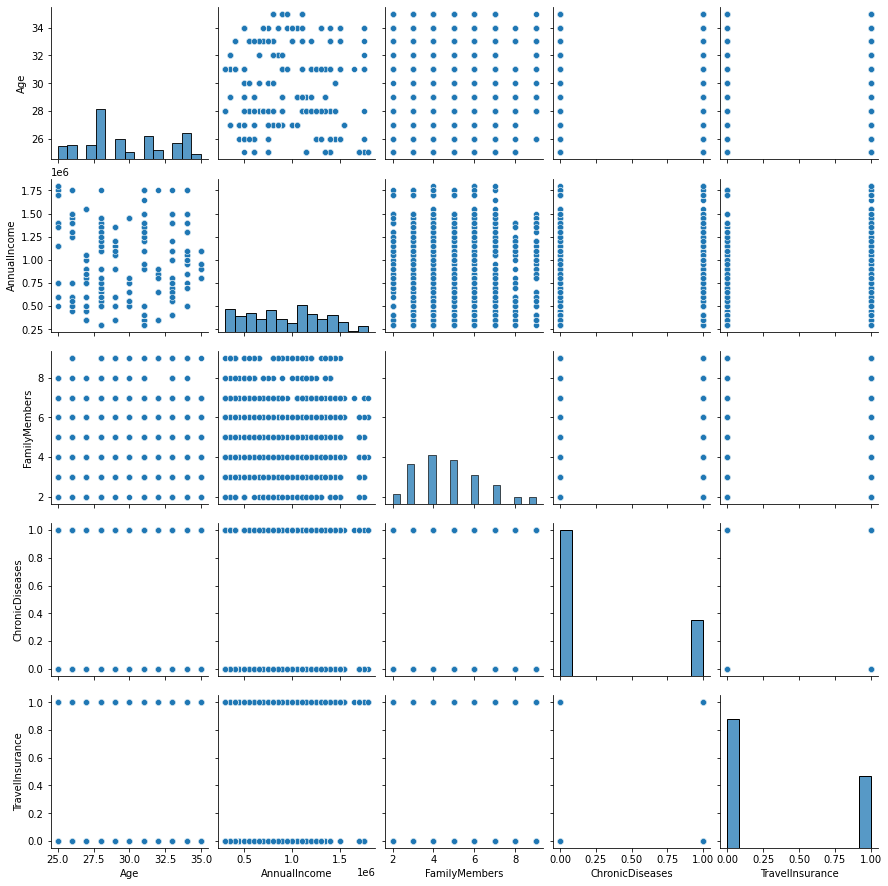

In [ ]:
import seaborn as sns
sns.pairplot(train_df.iloc[:,1:])

**'Employment Type'**

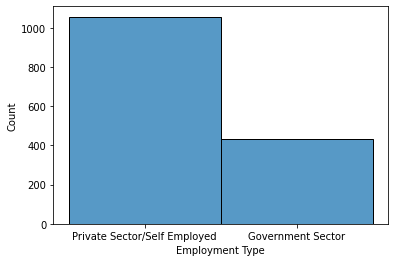

In [ ]:
sns.histplot(train_df['Employment Type'])

In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['Employment Type'],normalize='index',margins=True,)

Employment Type,Government Sector,Private Sector/Self Employed
TravelInsurance,,
0,0.347599,0.652401
1,0.187970,0.812030
All,0.290604,0.709396


Se observa relacion entre 'Employment Type' y 'TravelInsurance'

'**GraduateOrNot**'

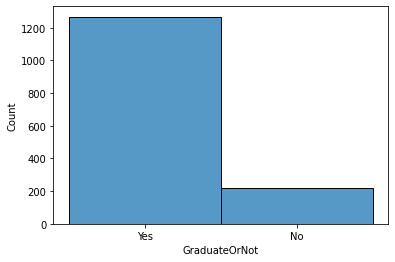

In [ ]:
sns.histplot(train_df['GraduateOrNot'])

In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['GraduateOrNot'],normalize='index',margins=True,)

GraduateOrNot,No,Yes
TravelInsurance,,
0,0.147182,0.852818
1,0.152256,0.847744
All,0.148993,0.851007


Se observa que la distribucón de Travel Insurance **no depende** de la condición de 'graduados o no '

**'FrequentFlyer'**

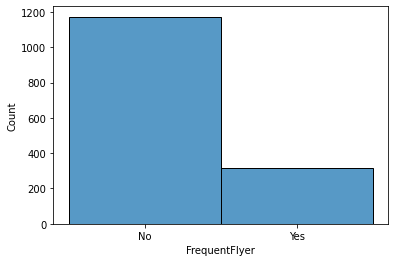

In [ ]:
sns.histplot(train_df['FrequentFlyer'])


In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['FrequentFlyer'],normalize='index',margins=True,)

FrequentFlyer,No,Yes
TravelInsurance,,
0,0.859081,0.140919
1,0.657895,0.342105
All,0.787248,0.212752


Se observa que la distribucón de Travel Insurance **cambia** en funcion de la condición de 'FrequentFlyer '

**'EverTravelledAbroad'**

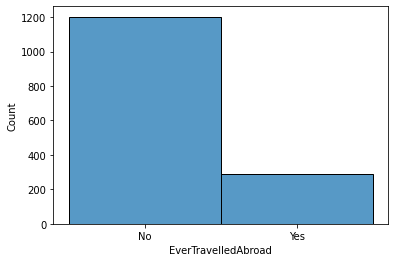

In [ ]:
sns.histplot(train_df['EverTravelledAbroad'])

In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['EverTravelledAbroad'],normalize='index',margins=True,)

EverTravelledAbroad,No,Yes
TravelInsurance,,
0,0.935282,0.064718
1,0.575188,0.424812
All,0.806711,0.193289


Se observa que la distribucón de Travel Insurance **cambia** en funcion de la condición de 'EverTravelledAbroad '



**'ChronicDiseases'**

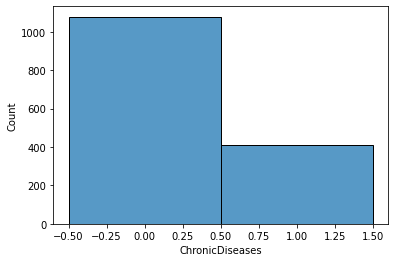

In [ ]:
sns.histplot(train_df['ChronicDiseases'],discrete=True)

In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['ChronicDiseases'],normalize='index',margins=True,)

ChronicDiseases,0,1
TravelInsurance,,
0,0.730689,0.269311
1,0.712406,0.287594
All,0.724161,0.275839


Se observa que la distribucón de Travel Insurance **no cambia** en funcion de la condición de 'ChronicDiseases '

**'FamilyMembers'**

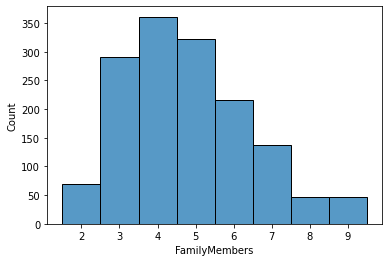

In [ ]:
sns.histplot(train_df['FamilyMembers'],discrete=True)

In [ ]:
pd.crosstab(train_df['TravelInsurance'],train_df['FamilyMembers'],normalize='index',margins=True,)

FamilyMembers,2,3,4,5,6,7,8,9
TravelInsurance,,,,,,,,
0,0.048017,0.196242,0.263048,0.230689,0.126305,0.080376,0.031315,0.024008
1,0.043233,0.193609,0.204887,0.189850,0.178571,0.114662,0.030075,0.045113
All,0.046309,0.195302,0.242282,0.216107,0.144966,0.092617,0.030872,0.031544


Los cambios en la distribución estan en 4,5,6,7 y 9 miembros, pareciera que a mayor cantidad de miembros más probable que adquieran el paquete

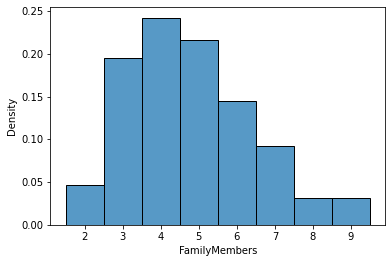

In [ ]:
sns.histplot(data=train_df, x='FamilyMembers', stat="density", discrete=True)

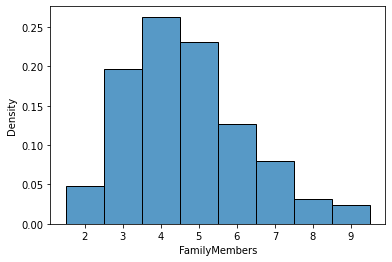

In [ ]:
sns.histplot(data=train_df[train_df['TravelInsurance']==0], x='FamilyMembers', stat="density", discrete=True)

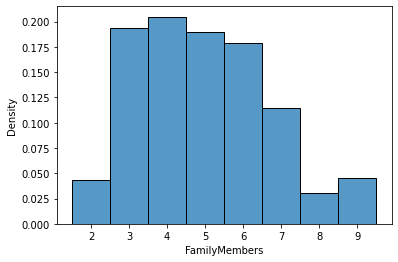

In [ ]:
sns.histplot(data=train_df[train_df['TravelInsurance']==1], x='FamilyMembers', stat="density", discrete=True)

Se observa que la distribucón de Travel Insurance **cambia** en funcion de la condición de 'FamilyMembers '

**'AnnualIncome'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


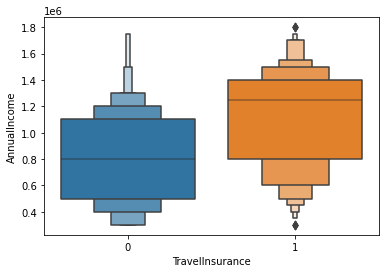

In [ ]:
ax=sns.boxenplot(train_df['TravelInsurance'],train_df['AnnualIncome'])



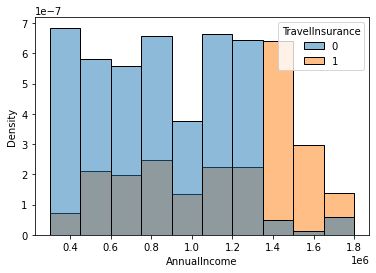

In [ ]:
sns.histplot(data=train_df, x='AnnualIncome', stat="density",hue='TravelInsurance',bins=10)

Se nota una dependencia de los ingresos, a mayor ingreso más probable que adquiera el seguro

**'Age'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


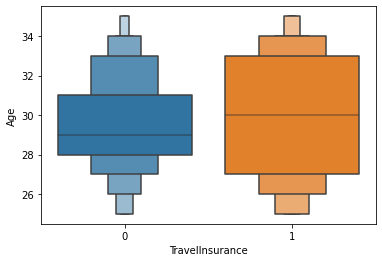

In [ ]:
ax=sns.boxenplot(train_df['TravelInsurance'],train_df['Age'])

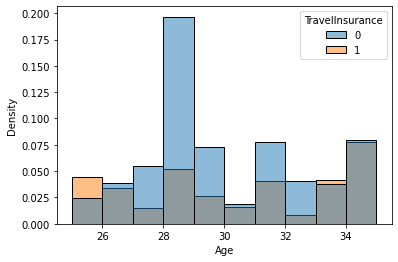

In [ ]:
sns.histplot(data=train_df, x='Age', stat="density",hue='TravelInsurance',bins=10
             )

Se ven algunas diferencias en la distribución en funcion de 'Age', entre 27 y 31 años es más probable que no lo adquieran (siendo de 28 a 29 donde es más probable que no lo adquieran), mayores de 32 tienen más probabilidad de adquirirlo, al igual que los menores de 26


Las variables que parecieran tener alguna relación con TravelInsurance son:
* 'Employment Type'
* Age
* AnnualIncome
* 'FamilyMembers'
* 'EverTravelledAbroad'
* 'FrequentFlyer'

**Duplicados**

In [ ]:
len(train_df[train_df.iloc[:,1:-1].duplicated()])

562

In [ ]:
len(train_df[train_df.iloc[:,1:].duplicated()])

468

Se observa que la cantidad de duplicados contando la columna de objetivo es menor a la cantidad de duplicados sin contarla, por lo que se llega a la conclusón que existen clientes que ante las mismas condiciones han decidido por si o no a la compra del paquete

In [ ]:
duplicados=train_df.groupby(by=['Age','Employment Type'	,'AnnualIncome','FamilyMembers','EverTravelledAbroad','FrequentFlyer','ChronicDiseases','GraduateOrNot']).agg({'Customer':'count','TravelInsurance':'sum'})

#train_df[(duplicados['Customer']!=1)]
(duplicados!=1).sum()

Customer           301
TravelInsurance    621
dtype: int64

In [ ]:
duplicados[(duplicados['TravelInsurance']!=0)&(duplicados['TravelInsurance']!=duplicados['Customer'])]

Customer  TravelInsurance
Age Employment Type              AnnualIncome FamilyMembers EverTravelledAbroad FrequentFlyer ChronicDiseases GraduateOrNot                           
25  Private Sector/Self Employed 1150000      4             No                  No            0               No                    3                1
                                 1400000      5             Yes                 Yes           0               Yes                   4                3
26  Private Sector/Self Employed 600000       6             No                  No            1               Yes                   2                1
                                 1250000      4             No                  No            0               Yes                   3                1
27  Government Sector            500000       2             No                  No            0               Yes                   3                1
...                                                                                                                               ...              ...
34  Private Sector/Self Employed 1300000      4             No                  No            0               No                    2                1
                                              6             No                  No            1               Yes                   2                1
                                 1500000      5             Yes                 Yes           1               Yes                   4                3
35  Government Sector            1100000      3             No                  No            0               Yes                   2                1
    Private Sector/Self Employed 800000       4             No                  No            0               No                    6                1

[94 rows x 2 columns]

Hay 94 agrupaciones con iguales atributos y distintos objetivos, hay ejemplos de agrupaciones con 6 clientes de los cuales 5 no compraron y uno si. Por lo que no es posible llegar a una clasificación perfecta

## Baseline

In this section we present a baseline based on a decision tree classifier.

Many of the attributes are binary, there are a couple of numeric attributes, we might be able to one-hot (e.g. family members), or event discretize (age and anual income), this will come more clearly after the EDA.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Transform the columns into features

First we need to transform the columns into features. The type of features we use will have a direct impact on the final result. In this example we decided to discretize some numeric features and make a one hot encoding of others. The number of bins, what we use as a one hot encoding, etc, is all up to you to try it out.

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

We transform the train and test data. In order to avoid overfitting is better to remove the `Customer` column and we don't want the `TravelInsurance` column as part of the attributes either.

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance"]))
y_train = train_df["TravelInsurance"].values
 
# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer']))

### Grid Search

We do a Grid Search for the Decision Tree (this can be replaced by a randomized search if the model is too complex).

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_

### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [ ]:
print(classification_report(y_train, best_tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.86      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.85      0.80      0.82      1490
weighted avg       0.84      0.84      0.84      1490



## Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [ ]:
test_id = test_df['Customer']
test_pred = best_tree_clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
#submission.to_csv("../data/travel_insurance_submission.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,0


## **RESOLUCIÓN**

In [ ]:

#intento de discretizar columnas que no tuvo buen resultado

#train_df['age_cat']=np.where(train_df['Age']>=31.5,2,np.where(train_df['Age']<=26.5,0,1))
#pd.crosstab(train_df['TravelInsurance'],train_df['age_cat'],normalize='index',margins=True,)
 
#train_df['income_cat']=np.where(train_df['AnnualIncome']>=1250000,2,np.where(train_df['AnnualIncome']<=800000,0,1))
#pd.crosstab(train_df['TravelInsurance'],train_df['income_cat'],normalize='index',margins=True,)
 
#train_df['familia_numerosa']=np.where(train_df['FamilyMembers']>=6,2,np.where(train_df['FamilyMembers']<4,0,1))
#pd.crosstab(train_df['TravelInsurance'],train_df['familia_numerosa'],normalize='index',margins=True,)

In [ ]:
#test_df['age_cat']=np.where(test_df['Age']>=31.5,2,np.where(test_df['Age']<=26.5,0,1))
 
#test_df['income_cat']=np.where(test_df['AnnualIncome']>=1250000,2,np.where(test_df['AnnualIncome']<=800000,0,1))
 
#test_df['familia_numerosa']=np.where(test_df['FamilyMembers']>=6,2,np.where(test_df['FamilyMembers']<4,0,1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import shutil

In [ ]:
metricas=pd.DataFrame(data=None,columns=['n_modelo','precision','recall','f1', 'accuracy','modelo'])

In [ ]:
def Metricas(metricas,nom_model,model,X,y):
  y_pred=model.predict(X)
  acc=accuracy_score(y,y_pred)
  p=precision_score(y,y_pred)
  f1=f1_score(y,y_pred)
  rec=recall_score(y,y_pred)
  metricas=metricas.append({'n_modelo':nom_model,'accuracy':acc,'precision':p,'recall':rec,'f1':f1,'modelo':model},ignore_index=True)
  return metricas

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
def submission(n_model,model,test_df,X_test):
  test_id = test_df['Customer']
  test_pred = model.predict(X_test)
  submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
  #submission.to_csv("../data/travel_insurance_submission_svc.csv", header=True, index=False)
  nombre=f'travel_insurance_submission_{n_model}.csv'
  submission.to_csv(nombre, header=True, index=False)
  shutil.copy("/content/"+nombre, "drive/My Drive/Diplomatura de Ciencia de Datos/GRuPO 17/AprendizajeSupervisado-master/practico/src/"+nombre)


## Modelo 1 
Decision Tree.
Con standard scaler

**Transformaciones a los datos**

In [ ]:
transformer2 = make_column_transformer(
    #(KBinsDiscretizer(n_bins=8, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (StandardScaler(with_mean=True),["Age", "AnnualIncome"]),
   
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", 
      "GraduateOrNot",
      "FamilyMembers", 
      "FrequentFlyer", 
      "EverTravelledAbroad"]),
    remainder="passthrough")

**Obtencion de X train e ytrain con los datos transformados**

In [ ]:
X_train = transformer2.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance",
                                                           ]))
y_train = train_df["TravelInsurance"].values
 

X_test = transformer2.transform(test_df.drop(columns=['Customer',
                                                 ]))

**Busqueda de Parametros**

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1,5)),
    'max_depth': list(range(2,15))
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf2 = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf2.fit(X_train, y_train)
 
best_tree_clf2 = tree_clf2.best_estimator_
best_tree_clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Calculo y guardado de las metricas**

In [ ]:
metricas=Metricas (metricas,'M1_Decision_Tree_w_StandScal',best_tree_clf2,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


**Reporte de clasificacion**

In [ ]:
print(classification_report(y_train, best_tree_clf2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       958
           1       0.93      0.59      0.72       532

    accuracy                           0.84      1490
   macro avg       0.87      0.78      0.80      1490
weighted avg       0.85      0.84      0.83      1490



**submission**

In [ ]:
submission('M1_Decision_Tree_w_StandScal',best_tree_clf2,test_df,X_test)

## Modelo 2
SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
transformer = make_column_transformer(
    #(KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
       ["Employment Type", 
      #"GraduateOrNot",
      "FamilyMembers", 
      "FrequentFlyer", 
      "EverTravelledAbroad"]),
    remainder="passthrough")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance",
                                                           "GraduateOrNot",                                                          
                                                           ]))
y_train = train_df["TravelInsurance"].values
 
# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer',
                                                     "GraduateOrNot",
                                                     ]))

In [ ]:
param_grid = {'C': [1,
                    10, 
                    100,
                    1000
                    ], 
              'gamma': [0.1,
                        1,
                        10
                        ],
              'kernel': ['rbf',
                         #'poly',
                         'sigmoid'
                         ]}
 
svc = SVC(random_state=42)
svc_clf = GridSearchCV(svc , param_grid, cv=5, scoring='f1', n_jobs=-1)
svc_clf.fit(X_train, y_train)
 
best_svc_clf = svc_clf.best_estimator_
best_svc_clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pd.DataFrame(svc_clf.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.089174,0.004320,0.014666,0.000347,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.631579,0.701031,0.670051,0.716418,0.663212,0.676458,0.029770,1
12,0.121036,0.017363,0.013852,0.000512,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.612245,0.700000,0.656716,0.692308,0.656716,0.663597,0.031245,2
18,0.110533,0.007073,0.013742,0.000809,1000,0.1,rbf,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.612245,0.696517,0.656716,0.692308,0.640394,0.659636,0.031788,3


In [ ]:
metricas= Metricas (metricas,'M2_SVC',best_svc_clf,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,M2_SVC,0.951724,0.778195,0.856256,0.906711,"SVC(C=10, break_ties=False, cache_size=200, cl..."


In [ ]:
print(classification_report(y_train, best_svc_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       958
           1       0.95      0.78      0.86       532

    accuracy                           0.91      1490
   macro avg       0.92      0.88      0.89      1490
weighted avg       0.91      0.91      0.90      1490



**submission**

In [ ]:
submission('M2_SVC',best_svc_clf,test_df,X_test)

## Modelo 3
Random Forest

In [ ]:
from sklearn import ensemble

In [ ]:
transformer = make_column_transformer(
    #(KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
       ["Employment Type", 
      #"GraduateOrNot",
      #'age_cat',
      #'income_cat',
      #'familia_numerosa',
      "FamilyMembers", 
      "FrequentFlyer", 
      "EverTravelledAbroad"]),
    remainder="passthrough")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance",
                                                           "GraduateOrNot",
                                                           #'age_cat','income_cat','familia_numerosa'
                                                           ]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer',
                                                     "GraduateOrNot",
                                                     #'age_cat','income_cat','familia_numerosa'
                                                     ]))

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1,5)),
    'max_depth': list(range(2,15)),
    'max_features':['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False],
}
 
rfores = ensemble.RandomForestClassifier(n_estimators=20,random_state=2)
rfores_clf = GridSearchCV(rfores , search_params, cv=5, scoring='f1', n_jobs=-1)
rfores_clf.fit(X_train, y_train)
 
best_rfores_clf = rfores_clf.best_estimator_
best_rfores_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
pd.DataFrame(rfores_clf.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
149,0.063320,0.000976,0.006592,0.000803,True,gini,14,sqrt,2,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.670455,0.711864,0.681319,0.784946,0.696629,0.709043,0.04045,1
145,0.064108,0.002870,0.007143,0.002861,True,gini,14,auto,2,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.670455,0.711864,0.681319,0.784946,0.696629,0.709043,0.04045,1
153,0.066297,0.003256,0.005993,0.000257,True,gini,14,log2,2,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.670455,0.711864,0.681319,0.784946,0.696629,0.709043,0.04045,1


In [ ]:
metricas= Metricas (metricas,'M3_random_forest_clf',best_rfores_clf,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,M2_SVC,0.951724,0.778195,0.856256,0.906711,"SVC(C=10, break_ties=False, cache_size=200, cl..."
2,M3_random_forest_clf,0.924870,0.671053,0.777778,0.863087,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


In [ ]:
print(classification_report(y_train, best_rfores_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       958
           1       0.92      0.67      0.78       532

    accuracy                           0.86      1490
   macro avg       0.88      0.82      0.84      1490
weighted avg       0.87      0.86      0.86      1490



**submission**

In [ ]:
submission('M3_random_forest_clf',best_rfores_clf,test_df,X_test)

## **Modelo 4**
**ExtraTreesClassifier**

In [ ]:
transformer = make_column_transformer(
    #(KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
       ["Employment Type", 
      #"GraduateOrNot",
      #'age_cat',
      #'income_cat',
      #'familia_numerosa',
      "FamilyMembers", 
      "FrequentFlyer", 
      "EverTravelledAbroad"]),
    remainder="passthrough")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance",
                                                           "GraduateOrNot",
                                                           #'age_cat','income_cat','familia_numerosa'
                                                           ]))
y_train = train_df["TravelInsurance"].values
 
# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer',
                                                     "GraduateOrNot",
                                                     #'age_cat','income_cat','familia_numerosa'
                                                     ]))

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': list(range(1,5)),
    'max_depth': list(range(2,15)),
    'max_features':['auto', 'sqrt', 'log2'],
}
 
etc = ensemble.ExtraTreesClassifier(n_estimators=20,random_state=2)
etc_clf = GridSearchCV(etc , search_params, cv=5, scoring='f1', n_jobs=-1)
etc_clf.fit(X_train, y_train)
 
best_etc_clf = etc_clf.best_estimator_
best_etc_clf

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=13, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [ ]:
 metricas= Metricas (metricas,'M4_extra_tree_clf',best_etc_clf,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,M2_SVC,0.951724,0.778195,0.856256,0.906711,"SVC(C=10, break_ties=False, cache_size=200, cl..."
2,M3_random_forest_clf,0.924870,0.671053,0.777778,0.863087,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,M4_extra_tree_clf,0.909589,0.624060,0.740245,0.843624,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."


In [ ]:
pd.DataFrame(etc_clf.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
289,0.052978,0.002477,0.005989,0.000054,entropy,13,auto,2,"{'criterion': 'entropy', 'max_depth': 13, 'max...",0.636364,0.719101,0.641711,0.73913,0.636364,0.674534,0.045056,1
293,0.056631,0.004163,0.007435,0.002925,entropy,13,sqrt,2,"{'criterion': 'entropy', 'max_depth': 13, 'max...",0.636364,0.719101,0.641711,0.73913,0.636364,0.674534,0.045056,1
297,0.052749,0.002444,0.007073,0.001896,entropy,13,log2,2,"{'criterion': 'entropy', 'max_depth': 13, 'max...",0.636364,0.719101,0.641711,0.73913,0.636364,0.674534,0.045056,1


In [ ]:
print(classification_report(y_train, best_etc_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       958
           1       0.91      0.62      0.74       532

    accuracy                           0.84      1490
   macro avg       0.87      0.79      0.81      1490
weighted avg       0.85      0.84      0.84      1490



**submission**

In [ ]:
submission('M4_extra_tree_clf',best_etc_clf,test_df,X_test)

## **Modelo 5**
**BaggingClassifier** con estimadores iniciales:
* SVC
* DecisionTreeClassifier

In [ ]:
transformer = make_column_transformer(
    #(KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
       ["Employment Type", 
      #"GraduateOrNot",
      "FamilyMembers", 
      "FrequentFlyer", 
      "EverTravelledAbroad"]),
    remainder="passthrough")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer',"TravelInsurance",
                                                           "GraduateOrNot",
                                                           
                                                           ]))
y_train = train_df["TravelInsurance"].values
 
# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer',
                                                     "GraduateOrNot",
                                                     ]))

In [ ]:
param_grid = {'max_samples': [1,
                    0.5, 0.8,
                  ],
              'n_estimators':[10,
                    20, 30,50,
                  ],
              'base_estimator':[DecisionTreeClassifier(random_state=42,min_samples_leaf=3,max_depth=9,criterion='entropy'),SVC(random_state=42,C=10,gamma=0.1,kernel='rbf')]
                         }
bag = ensemble.BaggingClassifier(random_state=2)
bag_clf = GridSearchCV(bag ,
                       param_grid,
                       cv=5, scoring='f1', n_jobs=-1)

In [ ]:
bag_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=2,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=N...
                                            SVC(C=10, break_ties=False,
                                                cache_size=200,
                                                class_weight=None, coef0=0.0,
                                                decision_function_shape='ovr',
                         

In [ ]:
bag_clf.fit(X_train, y_train)
 
best_bag_clf = bag_clf.best_estimator_
best_bag_clf

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=9,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=3,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
pd.DataFrame(bag_clf.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.041244,0.001556,0.005172,0.001262,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.5,10,{'base_estimator': DecisionTreeClassifier(ccp_...,0.674419,0.708571,0.681564,0.773481,0.678571,0.703321,0.037071,1
8,0.047726,0.006189,0.004432,0.000158,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.8,10,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670588,0.723164,0.644444,0.784530,0.693642,0.703274,0.048208,2
9,0.087076,0.003406,0.006727,0.000103,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.8,20,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670588,0.727273,0.644068,0.777778,0.694118,0.702765,0.046439,3
10,0.125387,0.002384,0.010046,0.001878,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.8,30,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670588,0.720000,0.644068,0.777778,0.694118,0.701310,0.045758,4
5,0.079912,0.005768,0.006773,0.000509,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.5,20,{'base_estimator': DecisionTreeClassifier(ccp_...,0.666667,0.715909,0.651429,0.777778,0.694118,0.701180,0.044273,5
7,0.193332,0.008051,0.013551,0.000627,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.5,50,{'base_estimator': DecisionTreeClassifier(ccp_...,0.674556,0.708571,0.643678,0.777778,0.694118,0.699740,0.044669,6
11,0.207482,0.004598,0.012616,0.000745,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.8,50,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670588,0.704545,0.655367,0.773481,0.694118,0.699620,0.040770,7
6,0.115805,0.003779,0.008918,0.000280,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.5,30,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670588,0.708571,0.643678,0.777778,0.686391,0.697401,0.045413,8
22,1.103923,0.023561,0.265086,0.007491,"SVC(C=10, break_ties=False, cache_size=200, cl...",0.8,30,"{'base_estimator': SVC(C=10, break_ties=False,...",0.656410,0.704663,0.691489,0.715026,0.670103,0.687538,0.021621,9
21,0.731265,0.013294,0.179286,0.002609,"SVC(C=10, break_ties=False, cache_size=200, cl...",0.8,20,"{'base_estimator': SVC(C=10, break_ties=False,...",0.638743,0.700508,0.684211,0.739583,0.659794,0.684568,0.034625,10


In [ ]:
 metricas= Metricas (metricas,'M5_bagging_clf',best_bag_clf,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,M2_SVC,0.951724,0.778195,0.856256,0.906711,"SVC(C=10, break_ties=False, cache_size=200, cl..."
2,M3_random_forest_clf,0.924870,0.671053,0.777778,0.863087,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,M4_extra_tree_clf,0.909589,0.624060,0.740245,0.843624,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."
4,M5_bagging_clf,0.917379,0.605263,0.729332,0.839597,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


In [ ]:
print(classification_report(y_train, best_bag_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       958
           1       0.92      0.61      0.73       532

    accuracy                           0.84      1490
   macro avg       0.87      0.79      0.81      1490
weighted avg       0.85      0.84      0.83      1490



**submission**

In [ ]:
submission('M5_bagging_clf',best_etc_clf,test_df,X_test)

## **Modelo 6**
**AdaBoostClassifier**

In [ ]:
param_grid = {
                 
              'n_estimators':[10,
                    20, 30,50,
                  ],
              'base_estimator':[DecisionTreeClassifier(random_state=42,min_samples_leaf=3,max_depth=9,criterion='entropy'),SVC(random_state=42,C=10,gamma=0.1,kernel='rbf')],
              'learning_rate':[0.01,0.1,1],
                         }
AdaBoost= ensemble.AdaBoostClassifier(random_state=2)
AdaBoost_clf = GridSearchCV(AdaBoost ,
                       param_grid,
                       cv=5, scoring='f1', n_jobs=-1)

In [ ]:
AdaBoost_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=2),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='entropy',
                                                                   max_depth=9,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_de...
                                            SVC(C=10, break_tie

In [ ]:
AdaBoost_clf.fit(X_train, y_train)
best_AdaBoost_clf = AdaBoost_clf.best_estimator_
best_AdaBoost_clf

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
pd.DataFrame(AdaBoost_clf.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.182571,0.001673,0.011944,0.000272,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.01,30,{'base_estimator': DecisionTreeClassifier(ccp_...,0.689655,0.719577,0.695652,0.741935,0.685714,0.706507,0.021261,1
0,0.062021,0.002527,0.005504,0.000482,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.01,10,{'base_estimator': DecisionTreeClassifier(ccp_...,0.670391,0.706522,0.662921,0.754098,0.731429,0.705072,0.034871,2
1,0.125843,0.006737,0.009083,0.000574,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.01,20,{'base_estimator': DecisionTreeClassifier(ccp_...,0.666667,0.723404,0.692308,0.741935,0.696629,0.704189,0.026078,3
4,0.062266,0.001938,0.004993,0.000142,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.1,10,{'base_estimator': DecisionTreeClassifier(ccp_...,0.656085,0.702703,0.712042,0.725490,0.666667,0.692597,0.026712,4
3,0.317555,0.011039,0.019849,0.001565,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.01,50,{'base_estimator': DecisionTreeClassifier(ccp_...,0.662983,0.712042,0.673797,0.747368,0.663043,0.691847,0.033103,5
6,0.189340,0.004059,0.011949,0.000201,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.1,30,{'base_estimator': DecisionTreeClassifier(ccp_...,0.632653,0.722513,0.687179,0.720812,0.631068,0.678845,0.040383,6
5,0.123242,0.001359,0.008579,0.000112,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.1,20,{'base_estimator': DecisionTreeClassifier(ccp_...,0.620000,0.708333,0.677083,0.716418,0.637255,0.671818,0.038026,7
7,0.308796,0.004903,0.019015,0.000621,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.1,50,{'base_estimator': DecisionTreeClassifier(ccp_...,0.638298,0.706468,0.676923,0.710000,0.624390,0.671216,0.034801,8
10,0.187584,0.007928,0.011993,0.000207,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,30,{'base_estimator': DecisionTreeClassifier(ccp_...,0.617647,0.686567,0.673171,0.695238,0.647059,0.663936,0.028301,9
9,0.123324,0.003869,0.009176,0.000488,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",1,20,{'base_estimator': DecisionTreeClassifier(ccp_...,0.606965,0.670000,0.685990,0.704225,0.640394,0.661515,0.034401,10


In [ ]:
 metricas= Metricas (metricas,'M6_AdaBoost_clf',AdaBoost_clf,X_train,y_train)
metricas

,n_modelo,precision,recall,f1,accuracy,modelo
0,M1_Decision_Tree_w_StandScal,0.926471,0.592105,0.722477,0.837584,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,M2_SVC,0.951724,0.778195,0.856256,0.906711,"SVC(C=10, break_ties=False, cache_size=200, cl..."
2,M3_random_forest_clf,0.924870,0.671053,0.777778,0.863087,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,M4_extra_tree_clf,0.909589,0.624060,0.740245,0.843624,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."
4,M5_bagging_clf,0.917379,0.605263,0.729332,0.839597,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
5,M6_AdaBoost_clf,0.959459,0.667293,0.787140,0.871141,"GridSearchCV(cv=5, error_score=nan,\n ..."


In [ ]:
print(classification_report(y_train, AdaBoost_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       958
           1       0.96      0.67      0.79       532

    accuracy                           0.87      1490
   macro avg       0.90      0.83      0.85      1490
weighted avg       0.88      0.87      0.86      1490



**submission**

In [ ]:
submission('M6_AdaBoost_clf',AdaBoost_clf,test_df,X_test)